In [22]:
import os
import pandas as pd 
import pathlib
import cv2   #pip install opencv-python
from PIL import  Image  # pip install pillow 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [23]:
import tensorflow as tf

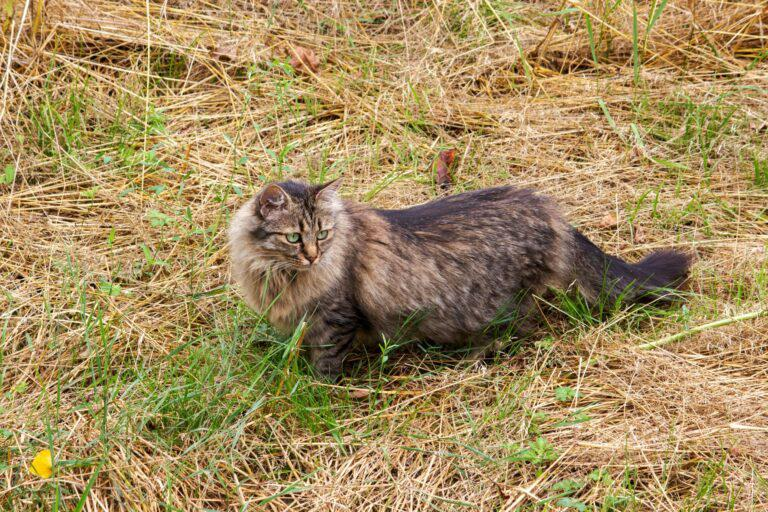

In [24]:
cat_image=r"C:\Users\Jai Ho\Desktop\deep l\CNN\Data\images\cats\cat_26.jpg"
cat_image_show=Image.open(cat_image)
cat_image_show

In [25]:
in_array=np.array(cat_image_show)
in_array

array([[[204, 159,  91],
        [172, 124,  58],
        [180, 130,  67],
        ...,
        [206, 167, 112],
        [213, 175, 130],
        [215, 178, 136]],

       [[196, 151,  83],
        [169, 121,  55],
        [175, 125,  62],
        ...,
        [236, 197, 142],
        [192, 154, 107],
        [135,  98,  54]],

       [[200, 155,  88],
        [180, 135,  68],
        [182, 134,  70],
        ...,
        [176, 137,  80],
        [140, 100,  49],
        [ 99,  61,  14]],

       ...,

       [[155, 152,  85],
        [144, 135,  70],
        [216, 191, 134],
        ...,
        [240, 204, 168],
        [181, 140, 110],
        [199, 158, 130]],

       [[168, 172,  98],
        [126, 122,  51],
        [168, 147,  82],
        ...,
        [225, 196, 162],
        [211, 177, 150],
        [146, 110,  86]],

       [[161, 168,  91],
        [134, 132,  58],
        [152, 133,  65],
        ...,
        [164, 138, 105],
        [246, 216, 192],
        [205, 173, 152]]

In [26]:
in_array.shape

(512, 768, 3)

In [27]:
os.getcwd()

'c:\\Users\\Jai Ho\\Desktop\\deep l\\CNN'

In [28]:
dict_path={"cats":[],"dogs":[]}
Image_path=r"C:\Users\Jai Ho\Desktop\deep l\CNN\Data\images"
for dir in os.listdir(Image_path):
    dirt_path = os.path.join(Image_path,dir)
    print(dirt_path)
    for image_path in os.listdir(dirt_path):
        dict_path[dir].append(os.path.join(dirt_path,image_path))
dict_path

C:\Users\Jai Ho\Desktop\deep l\CNN\Data\images\cats
C:\Users\Jai Ho\Desktop\deep l\CNN\Data\images\dogs


{'cats': ['C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_1.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_10.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_100.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_101.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_102.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_103.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_104.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_106.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_109.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_11.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_111.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_113.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\ca

In [29]:
dict_path

{'cats': ['C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_1.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_10.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_100.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_101.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_102.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_103.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_104.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_106.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_109.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_11.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_111.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_113.jpg',
  'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\ca

In [30]:
img_arr_lst=[]
lables=[]

for key,value in dict_path.items():
    print(value)
    for path in value:
        img_arr=cv2.imread(path)# it read the covert data in array
        resize_img=cv2.resize(img_arr,(224,244))
        img_arr_lst.append(resize_img)
        lables.append(key)
  
  # at_image=(x,y)
  # at_image_show=Image.open
  # at_image_show

['C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_1.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_10.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_100.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_101.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_102.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_103.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_104.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_106.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_109.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_11.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_111.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_113.jpg', 'C:\\Users\\Jai Ho\\Desktop\\deep l\\CNN\\Data\\images\\cats\\cat_114.jpg', 'C:\\Users\\Jai

### convert into array

In [31]:
array_image=np.array(img_arr_lst)
lables=np.array(lables)
array_image.shape


(697, 244, 224, 3)

In [32]:
lables

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

### list comprehesion



In [33]:
# ### list 
# fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
# newlist = []

# for x in fruits:
#   if "a" in x:
#     newlist.append(x)

# print(newlist)

In [34]:
# fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

# newlist = [x for x in fruits if "a" in x]

# print(newlist)

In [35]:
lables=np.array([0 if item=='dogs' else 1 for item in list(lables)])

In [36]:
lables

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
x_train,x_test,y_train,y_test=train_test_split(array_image,lables,test_size=0.2,random_state=42)

In [38]:
x_train

array([[[[216, 212, 207],
         [228, 225, 221],
         [222, 220, 219],
         ...,
         [230, 230, 230],
         [229, 229, 229],
         [229, 229, 229]],

        [[217, 213, 208],
         [228, 225, 221],
         [223, 221, 220],
         ...,
         [230, 230, 230],
         [229, 229, 229],
         [229, 229, 229]],

        [[218, 214, 209],
         [227, 225, 220],
         [223, 221, 220],
         ...,
         [230, 230, 230],
         [229, 229, 229],
         [229, 229, 229]],

        ...,

        [[139, 134, 131],
         [138, 133, 130],
         [138, 133, 130],
         ...,
         [179, 175, 170],
         [178, 174, 169],
         [177, 173, 168]],

        [[144, 139, 136],
         [143, 138, 135],
         [142, 137, 134],
         ...,
         [181, 177, 172],
         [180, 176, 171],
         [179, 175, 170]],

        [[147, 142, 139],
         [145, 140, 137],
         [144, 139, 136],
         ...,
         [182, 178, 173],
        

In [39]:
x_train=x_train/255



In [40]:
x_test=x_test/255

In [41]:
x_train.shape,y_train.shape

((557, 244, 224, 3), (557,))

In [42]:
y_train

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

## cnn apply

In [44]:
from tensorflow.keras import layers

In [45]:
# Define the CNN architecture
model = Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(244, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# backword propogetion
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()



C:\Users\Jai Ho\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 189696)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    12,140,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,196,993 (46.53 MB)

 Trainable params: 12,196,993 (46.53 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(x_train,y_train,initial_epoch=2,epochs=10,batch_size=52,validation_data=(x_test,y_test))

Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.4912 - loss: 2.6013 - val_accuracy: 0.5857 - val_loss: 0.6908
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.5080 - loss: 0.6867 - val_accuracy: 0.5643 - val_loss: 0.6969
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.6430 - loss: 0.6571 - val_accuracy: 0.5286 - val_loss: 0.7333
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.6179 - loss: 0.6384 - val_accuracy: 0.6071 - val_loss: 0.7318
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.7728 - loss: 0.5605 - val_accuracy: 0.6286 - val_loss: 0.7209
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.7536 - loss: 0.5381 - val_accuracy: 0.6071 - val_loss: 0.7596
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.8230 - loss: 0.4464 - val_accuracy: 0.6214 - val_loss: 0.7754
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.8611 - loss: 0.3587 - val_accuracy: 0.6429 - val_loss

In [47]:
training_history_data = pd.DataFrame(history.history)
training_history_data

,accuracy,loss,val_accuracy,val_loss
0,0.504488,1.733534,0.585714,0.690805
1,0.522442,0.683905,0.564286,0.696950
2,0.622980,0.651328,0.528571,0.733272
3,0.601436,0.639413,0.607143,0.731753
4,0.748653,0.569534,0.628571,0.720908
5,0.759426,0.515390,0.607143,0.759602
6,0.827648,0.431832,0.621429,0.775417
7,0.847397,0.374945,0.642857,0.705431


<Axes: >

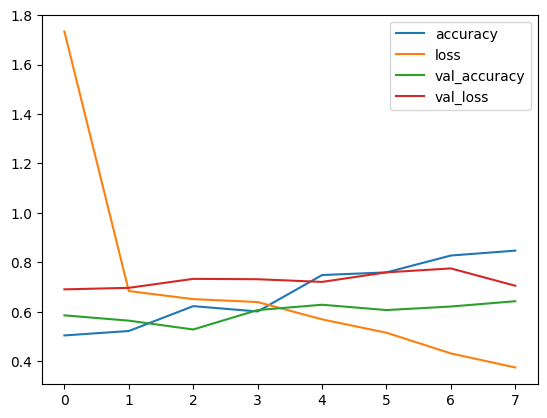

In [48]:
training_history_data.plot()

<Axes: >

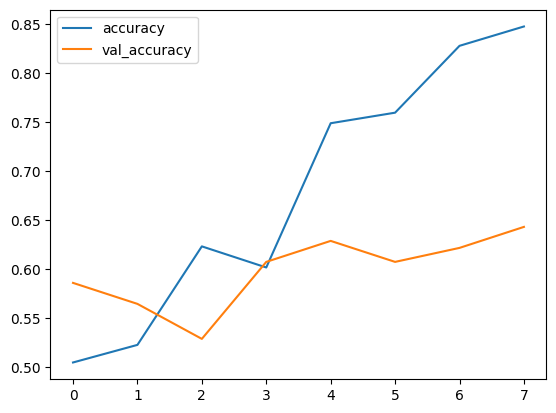

In [49]:
training_history_data[['accuracy','val_accuracy']].plot()
# Accuracy vs Validation Accuracy

In [50]:
accuracy_on_training_data = model.evaluate(x_train,y_train)
accuracy_on_training_data

18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 552ms/step - accuracy: 0.8844 - loss: 0.3477


[0.34676337242126465, 0.8779174089431763]

In [51]:
y_pred = model.predict(x_test)
# Get the prediction

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step


In [52]:
model.save("CNN.h5")